# Data Exploration

## Import

In [1]:
import pandas as pd # For handling and analyzing tabular data

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

import re # For validating and manipulating text
import numpy as np # For numeric calculation

## Read data from CSV file

In [2]:
version = '24122024'
anime_data = pd.read_csv(f'./data/anime_data_{version}.csv')

# Check dataset
anime_data

,ID,Title,Alternative Title (en),Media Type,Status,Premiered Season,Genres,User Score,Number of Ratings,Number of Members,Studios,Rating
0,3907,Ginga Sengoku Gunyuuden Rai,Galaxy Warring State Chronicle Rai,tv,finished_airing,Spring 1994,"Adventure, Romance, Sci-Fi, Shounen, Space",7.89,5597,16666,E&G Films,pg_13
1,1573,Kishin Douji Zenki,Zenki,tv,finished_airing,Winter 1995,"Action, Comedy, Drama, Fantasy, Horror, Mythol...",6.97,5964,15154,Studio Deen,pg_13
2,520,Marmalade Boy Movie,NaN,movie,finished_airing,Winter 1995,"Romance, Shoujo",7.29,5092,11688,Toei Animation,pg_13
3,103,Akazukin Chacha,Red Riding Hood Chacha,tv,finished_airing,Winter 1994,"Adventure, Comedy, Fantasy, Mahou Shoujo, Roma...",7.40,6089,16950,Gallop,g
4,813,Dragon Ball Z,Dragon Ball Z,tv,finished_airing,Spring 1989,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.19,866014,1261770,Toei Animation,pg_13
...,...,...,...,...,...,...,...,...,...,...,...,...
4357,58488,Sengoku Youko: Senma Konton-hen,Sengoku Youko 2nd Season,tv,currently_airing,Summer 2024,"Action, Adventure, Fantasy, Historical, Mythol...",7.26,2947,21154,White Fox,pg_13
4358,52995,Arifureta Shokugyou de Sekai Saikyou Season 3,Arifureta: From Commonplace to World's Stronge...,tv,currently_airing,Fall 2024,"Action, Adventure, Fantasy, Harem, Isekai",7.36,11943,139526,asread.,r
4359,57611,Kimi wa Meido-sama.,You are Ms. Servant.,tv,finished_airing,Fall 2024,"Comedy, Romance",7.10,20892,94185,Felix Film,pg_13
4360,57891,Hitoribocchi no Isekai Kouryaku,Loner Life in Another World,tv,finished_airing,Fall 2024,"Action, Adventure, Fantasy, Isekai",6.57,29485,86450,"Passione, Hayabusa Film",pg_13


## Explore columns and rows

### Column names

In [3]:
column_names = anime_data.columns # Get column names
column_names

Index(['ID', 'Title', 'Alternative Title (en)', 'Media Type', 'Status',
       'Premiered Season', 'Genres', 'User Score', 'Number of Ratings',
       'Number of Members', 'Studios', 'Rating'],
      dtype='object')

### Column meanings
- **ID**: A unique identifier for each anime entry in the dataset. It helps to distinguish individual anime records.
- **Title**: The main title of the anime (usually in the original language or its official English title).
- **Alternative Title (en)**: The alternative English title for the anime, if available. It could be a localized or translated title.
- **Media Type**: The format of the anime, e.g., ```tv``` for television series or ```movie``` for feature films.
- **Status**: The airing or release status of the anime (```finished_airing``` or ```currently_airing```).
- **Premiered Season**: Indicates the season and year when the anime premiered, e.g., ```Winter 2024```, ```Spring 1995```.
- **Genres**: A list of genres describing the anime’s theme or content.
- **User Score**: The average score given by users to the anime, typically on a scale of 0 to 10, often with two decimal places. It reflects how well the anime is rated.
- **Number of Ratings**: The number of user ratings the anime has received. This indicates how many people have participated in scoring the anime.
- **Number of Members**: The total number of users showing interest in the anime. It provides a measure of the anime’s popularity.
- **Studios**: The production studios that created the anime. Multiple studios may collaborate on a single anime, and their names are listed here.
- **Rating**: The content rating of the anime based on the MPAA system (e.g., G, PG-13, R, etc.). This indicates the target audience and age restrictions, if any.

### Data type of columns

In [4]:
column_types = anime_data.dtypes # Get data type of columns
column_types

ID                          int64
Title                      object
Alternative Title (en)     object
Media Type                 object
Status                     object
Premiered Season           object
Genres                     object
User Score                float64
Number of Ratings           int64
Number of Members           int64
Studios                    object
Rating                     object
dtype: object

$\rightarrow$ The data type of each column is **accurate** and does not need any modifications.

### What does each row mean?

In [5]:
anime_data.head(10)

,ID,Title,Alternative Title (en),Media Type,Status,Premiered Season,Genres,User Score,Number of Ratings,Number of Members,Studios,Rating
0,3907,Ginga Sengoku Gunyuuden Rai,Galaxy Warring State Chronicle Rai,tv,finished_airing,Spring 1994,"Adventure, Romance, Sci-Fi, Shounen, Space",7.89,5597,16666,E&G Films,pg_13
1,1573,Kishin Douji Zenki,Zenki,tv,finished_airing,Winter 1995,"Action, Comedy, Drama, Fantasy, Horror, Mythol...",6.97,5964,15154,Studio Deen,pg_13
2,520,Marmalade Boy Movie,NaN,movie,finished_airing,Winter 1995,"Romance, Shoujo",7.29,5092,11688,Toei Animation,pg_13
3,103,Akazukin Chacha,Red Riding Hood Chacha,tv,finished_airing,Winter 1994,"Adventure, Comedy, Fantasy, Mahou Shoujo, Roma...",7.40,6089,16950,Gallop,g
4,813,Dragon Ball Z,Dragon Ball Z,tv,finished_airing,Spring 1989,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.19,866014,1261770,Toei Animation,pg_13
5,331,Mahoujin Guruguru,Magical Circle Guru Guru,tv,finished_airing,Fall 1994,"Adventure, Comedy, Fantasy, Shounen",7.59,3948,11753,Nippon Animation,g
6,96,Kidou Butouden G Gundam,Mobile Fighter G Gundam,tv,finished_airing,Spring 1994,"Action, Drama, Martial Arts, Mecha, Romance, S...",7.58,38677,72003,Sunrise,pg_13
7,2471,Doraemon (1979),Doraemon,tv,finished_airing,Spring 1979,"Adventure, Anthropomorphic, Comedy, Fantasy, K...",7.86,39483,66328,Shin-Ei Animation,pg
8,334,Marmalade Boy,Marmalade Boy,tv,finished_airing,Spring 1994,"Comedy, Drama, Romance, Shoujo",7.42,22756,58114,Toei Animation,pg_13
9,435,Magic Knight Rayearth,Magic Knight Rayearth,tv,finished_airing,Fall 1994,"Action, Adventure, Comedy, Drama, Fantasy, Ise...",7.45,30092,73900,Tokyo Movie Shinsha,pg_13


$\rightarrow$ Each row will provide **information** about a **specific anime series**.

## Preprocess

### Missing items
- **Identify** columns with missing items (null or empty):

In [6]:
columns_with_missing = anime_data.columns[anime_data.isnull().any()] # Extract columns with missing values
columns_with_missing

Index(['Alternative Title (en)', 'Studios'], dtype='object')

- Create a **function** to check missing items by column:

In [7]:
def check_missing_for_column(column):
    rows_with_missing = anime_data[anime_data[column].isnull()]

    # Extract rows with missing data in a specific column
    result = rows_with_missing[['ID', 'Title', column]]

    print(f"Rows with missing values in column: {column}")
    print(result)

    # Extract the number of missing items
    print(f"Number of missing items: {len(result)}")

#### Column 'Alternative Title (en)'
- Extract rows with missing items:

In [8]:
check_missing_for_column('Alternative Title (en)') # Extract rows with missing values in column 'Alternative Title (en)'

Rows with missing values in column: Alternative Title (en)
         ID                       Title Alternative Title (en)
2       520         Marmalade Boy Movie                    NaN
16     1397                   Macross 7                    NaN
17     1674           Captain Tsubasa J                    NaN
27     1674           Captain Tsubasa J                    NaN
35     1397                   Macross 7                    NaN
...     ...                         ...                    ...
4269  55102              Girls Band Cry                    NaN
4270  58125                   Look Back                    NaN
4282  54309  Blue Archive the Animation                    NaN
4290   8687             Doraemon (2005)                    NaN
4335   8687             Doraemon (2005)                    NaN

[694 rows x 3 columns]
Number of missing items: 694


$\rightarrow$ **Solution**: Fill in 'None' for the missing values.


In [9]:
anime_data['Alternative Title (en)'] = anime_data['Alternative Title (en)'].fillna('None') # Fill in 'None' for the missing values

- Re-check:

In [10]:
check_missing_for_column('Alternative Title (en)') # Re-check

Rows with missing values in column: Alternative Title (en)
Empty DataFrame
Columns: [ID, Title, Alternative Title (en)]
Index: []
Number of missing items: 0


#### Column 'Studios'
- Extract rows with missing items:

In [11]:
check_missing_for_column('Studios') # Extract rows with missing values in column 'Studios'

Rows with missing values in column: Studios
         ID                                              Title Studios
405    3914                                        1001 Nights     NaN
1079    548                                     Wonderful Days     NaN
1752   6609                                         Pucca (TV)     NaN
1768   6609                                         Pucca (TV)     NaN
2201   3087                                          Cencoroll     NaN
3389  39478  Shingeki no Kyojin in the Dome: Heishi-tachi n...     NaN
Number of missing items: 6


$\rightarrow$ **Solution**: Fill in 'Unknown' for the missing values.

In [12]:
anime_data['Studios'] = anime_data['Studios'].fillna('Unknown') # Fill in 'Unknown' for the missing values

- Re-check:

In [13]:
check_missing_for_column('Studios') # Re-check

Rows with missing values in column: Studios
Empty DataFrame
Columns: [ID, Title, Studios]
Index: []
Number of missing items: 0


#### Re-check for all columns

In [14]:
missing_values = anime_data.isnull().sum() # Check for null and empty

print("Number of missing values per column:")
print(missing_values)

Number of missing values per column:
ID                        0
Title                     0
Alternative Title (en)    0
Media Type                0
Status                    0
Premiered Season          0
Genres                    0
User Score                0
Number of Ratings         0
Number of Members         0
Studios                   0
Rating                    0
dtype: int64


### Non-standard items
- When we have applied **constraints** during data collection, this process is merely intended to **check** and **validate** whether the dataset meets the initial **requirements**.

$\rightarrow$ **Solution**: Try to **delete** the rows containing values that **do not match** the **standard structure** of items for each column.



#### Validation functions

**Standard structure** of items for each column:
- ```ID```: A single integer number (No leading zero, for example, 0109 is not permitted).
- ```Title``` and ```Alternative Title (en)```: No constraint.
- ```Media Type```: Only ```tv``` or ```movie``` (lowercase).
- ```Status```: Only ```finished_airing``` or ```currently_airing``` (lowercase).
- ```Premiered Season```: Season + Year, for example: ```Winter 2024```.
- ```Genres```: No excluded genres and contains at least **one** of the included genres.
- ```User Score```: A single float number, not less than 0 and not greater than 10.
- ```Number of Ratings```: A single integer number, greater than 2000.
- ```Number of Members```: A single integer number, greater than 10000.
- ```Studios```: No constraint.
- ```Rating```: Follows MPAA (Motion Picture Association of America, [click here for more information](https://myanimelist.net/info.php?go=mpaa)) system (lowercase).

In [15]:
# Prepare
included_genres = [
    'action', 'adventure', 'comedy', 'drama', 'fantasy',
    'mystery', 'romance', 'sci-fi', 'sports',
    'slice of life', 'horror', 'supernatural'
]
excluded_genres = ['hentai', 'erotica']
mpaa_ratings = ['g', 'pg', 'pg_13', 'r', 'r+'] # Exclude final rating standard (please check the reference link for this part)

In [16]:
# Define validation functions for each column
def validate_id(value):
    return isinstance(value, int) and not str(value).startswith('0')

def validate_media_type(value):
    return value.lower() in ['tv', 'movie']

def validate_status(value):
    return value.lower() in ['finished_airing', 'currently_airing']

def validate_premiered_season(value):
    return re.match(r'^(Winter|Spring|Summer|Fall) \d{4}$', value) is not None

def validate_genres(value):
    genres = value.split(', ')
    return all(genre.lower() not in excluded_genres for genre in genres) and any(genre.lower() in included_genres for genre in genres)

def validate_user_score(value):
    return isinstance(value, float) and 0.0 <= value <= 10.0

def validate_number_of_ratings(value):
    return isinstance(value, int) and value >= 2000

def validate_number_of_members(value):
    return isinstance(value, int) and value >= 10000

def validate_rating(value):
    return value.lower() in mpaa_ratings

#### Validate and exclude incorrect rows 

In [17]:
# Apply validations and keep only valid rows
test_anime_data = anime_data[
    anime_data['ID'].apply(validate_id) &
    anime_data['Media Type'].apply(validate_media_type) &
    anime_data['Status'].apply(validate_status) &
    anime_data['Premiered Season'].apply(validate_premiered_season) &
    anime_data['Genres'].apply(validate_genres) &
    anime_data['User Score'].apply(validate_user_score) &
    anime_data['Number of Ratings'].apply(validate_number_of_ratings) &
    anime_data['Number of Members'].apply(validate_number_of_members) &
    anime_data['Rating'].apply(validate_rating)
]

# Check dataset
test_anime_data

,ID,Title,Alternative Title (en),Media Type,Status,Premiered Season,Genres,User Score,Number of Ratings,Number of Members,Studios,Rating
0,3907,Ginga Sengoku Gunyuuden Rai,Galaxy Warring State Chronicle Rai,tv,finished_airing,Spring 1994,"Adventure, Romance, Sci-Fi, Shounen, Space",7.89,5597,16666,E&G Films,pg_13
1,1573,Kishin Douji Zenki,Zenki,tv,finished_airing,Winter 1995,"Action, Comedy, Drama, Fantasy, Horror, Mythol...",6.97,5964,15154,Studio Deen,pg_13
2,520,Marmalade Boy Movie,None,movie,finished_airing,Winter 1995,"Romance, Shoujo",7.29,5092,11688,Toei Animation,pg_13
3,103,Akazukin Chacha,Red Riding Hood Chacha,tv,finished_airing,Winter 1994,"Adventure, Comedy, Fantasy, Mahou Shoujo, Roma...",7.40,6089,16950,Gallop,g
4,813,Dragon Ball Z,Dragon Ball Z,tv,finished_airing,Spring 1989,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.19,866014,1261770,Toei Animation,pg_13
...,...,...,...,...,...,...,...,...,...,...,...,...
4357,58488,Sengoku Youko: Senma Konton-hen,Sengoku Youko 2nd Season,tv,currently_airing,Summer 2024,"Action, Adventure, Fantasy, Historical, Mythol...",7.26,2947,21154,White Fox,pg_13
4358,52995,Arifureta Shokugyou de Sekai Saikyou Season 3,Arifureta: From Commonplace to World's Stronge...,tv,currently_airing,Fall 2024,"Action, Adventure, Fantasy, Harem, Isekai",7.36,11943,139526,asread.,r
4359,57611,Kimi wa Meido-sama.,You are Ms. Servant.,tv,finished_airing,Fall 2024,"Comedy, Romance",7.10,20892,94185,Felix Film,pg_13
4360,57891,Hitoribocchi no Isekai Kouryaku,Loner Life in Another World,tv,finished_airing,Fall 2024,"Action, Adventure, Fantasy, Isekai",6.57,29485,86450,"Passione, Hayabusa Film",pg_13


- **Very few** rows had been removed $\rightarrow$ **Acceptable** solution.

In [18]:
# Fix indices
anime_data = test_anime_data.reset_index(drop=True)
anime_data

,ID,Title,Alternative Title (en),Media Type,Status,Premiered Season,Genres,User Score,Number of Ratings,Number of Members,Studios,Rating
0,3907,Ginga Sengoku Gunyuuden Rai,Galaxy Warring State Chronicle Rai,tv,finished_airing,Spring 1994,"Adventure, Romance, Sci-Fi, Shounen, Space",7.89,5597,16666,E&G Films,pg_13
1,1573,Kishin Douji Zenki,Zenki,tv,finished_airing,Winter 1995,"Action, Comedy, Drama, Fantasy, Horror, Mythol...",6.97,5964,15154,Studio Deen,pg_13
2,520,Marmalade Boy Movie,None,movie,finished_airing,Winter 1995,"Romance, Shoujo",7.29,5092,11688,Toei Animation,pg_13
3,103,Akazukin Chacha,Red Riding Hood Chacha,tv,finished_airing,Winter 1994,"Adventure, Comedy, Fantasy, Mahou Shoujo, Roma...",7.40,6089,16950,Gallop,g
4,813,Dragon Ball Z,Dragon Ball Z,tv,finished_airing,Spring 1989,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.19,866014,1261770,Toei Animation,pg_13
...,...,...,...,...,...,...,...,...,...,...,...,...
4353,58488,Sengoku Youko: Senma Konton-hen,Sengoku Youko 2nd Season,tv,currently_airing,Summer 2024,"Action, Adventure, Fantasy, Historical, Mythol...",7.26,2947,21154,White Fox,pg_13
4354,52995,Arifureta Shokugyou de Sekai Saikyou Season 3,Arifureta: From Commonplace to World's Stronge...,tv,currently_airing,Fall 2024,"Action, Adventure, Fantasy, Harem, Isekai",7.36,11943,139526,asread.,r
4355,57611,Kimi wa Meido-sama.,You are Ms. Servant.,tv,finished_airing,Fall 2024,"Comedy, Romance",7.10,20892,94185,Felix Film,pg_13
4356,57891,Hitoribocchi no Isekai Kouryaku,Loner Life in Another World,tv,finished_airing,Fall 2024,"Action, Adventure, Fantasy, Isekai",6.57,29485,86450,"Passione, Hayabusa Film",pg_13


### Duplicated rows
- Calculate the number of **duplicated** rows:

In [19]:
num_duplicates = anime_data.duplicated().sum() # Get the number of duplicated rows
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 2029


- **Remove** duplicated rows (keep first one):

In [20]:
anime_data = anime_data.drop_duplicates(keep='first').reset_index(drop=True) # Remove duplicated rows (keep first one) and fix indices
anime_data

,ID,Title,Alternative Title (en),Media Type,Status,Premiered Season,Genres,User Score,Number of Ratings,Number of Members,Studios,Rating
0,3907,Ginga Sengoku Gunyuuden Rai,Galaxy Warring State Chronicle Rai,tv,finished_airing,Spring 1994,"Adventure, Romance, Sci-Fi, Shounen, Space",7.89,5597,16666,E&G Films,pg_13
1,1573,Kishin Douji Zenki,Zenki,tv,finished_airing,Winter 1995,"Action, Comedy, Drama, Fantasy, Horror, Mythol...",6.97,5964,15154,Studio Deen,pg_13
2,520,Marmalade Boy Movie,None,movie,finished_airing,Winter 1995,"Romance, Shoujo",7.29,5092,11688,Toei Animation,pg_13
3,103,Akazukin Chacha,Red Riding Hood Chacha,tv,finished_airing,Winter 1994,"Adventure, Comedy, Fantasy, Mahou Shoujo, Roma...",7.40,6089,16950,Gallop,g
4,813,Dragon Ball Z,Dragon Ball Z,tv,finished_airing,Spring 1989,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.19,866014,1261770,Toei Animation,pg_13
...,...,...,...,...,...,...,...,...,...,...,...,...
2324,58488,Sengoku Youko: Senma Konton-hen,Sengoku Youko 2nd Season,tv,currently_airing,Summer 2024,"Action, Adventure, Fantasy, Historical, Mythol...",7.26,2947,21154,White Fox,pg_13
2325,52995,Arifureta Shokugyou de Sekai Saikyou Season 3,Arifureta: From Commonplace to World's Stronge...,tv,currently_airing,Fall 2024,"Action, Adventure, Fantasy, Harem, Isekai",7.36,11943,139526,asread.,r
2326,57611,Kimi wa Meido-sama.,You are Ms. Servant.,tv,finished_airing,Fall 2024,"Comedy, Romance",7.10,20892,94185,Felix Film,pg_13
2327,57891,Hitoribocchi no Isekai Kouryaku,Loner Life in Another World,tv,finished_airing,Fall 2024,"Action, Adventure, Fantasy, Isekai",6.57,29485,86450,"Passione, Hayabusa Film",pg_13


$\rightarrow$ The dataset remains sufficiently **large** ($\geq 1000$ samples) after removing duplicated rows $\rightarrow$ The dataset is still **valid** and **usable**.

### Correlation
- Check **correlation** for numerical data columns:

In [21]:
# Compute the correlation matrix for numeric columns
corr = anime_data.corr(numeric_only=True)

print("Correlation Matrix:")
print(corr)

Correlation Matrix:
                         ID  User Score  Number of Ratings  Number of Members
ID                 1.000000    0.268571           0.091003           0.109608
User Score         0.268571    1.000000           0.415732           0.447495
Number of Ratings  0.091003    0.415732           1.000000           0.990242
Number of Members  0.109608    0.447495           0.990242           1.000000


- **Visualize**:

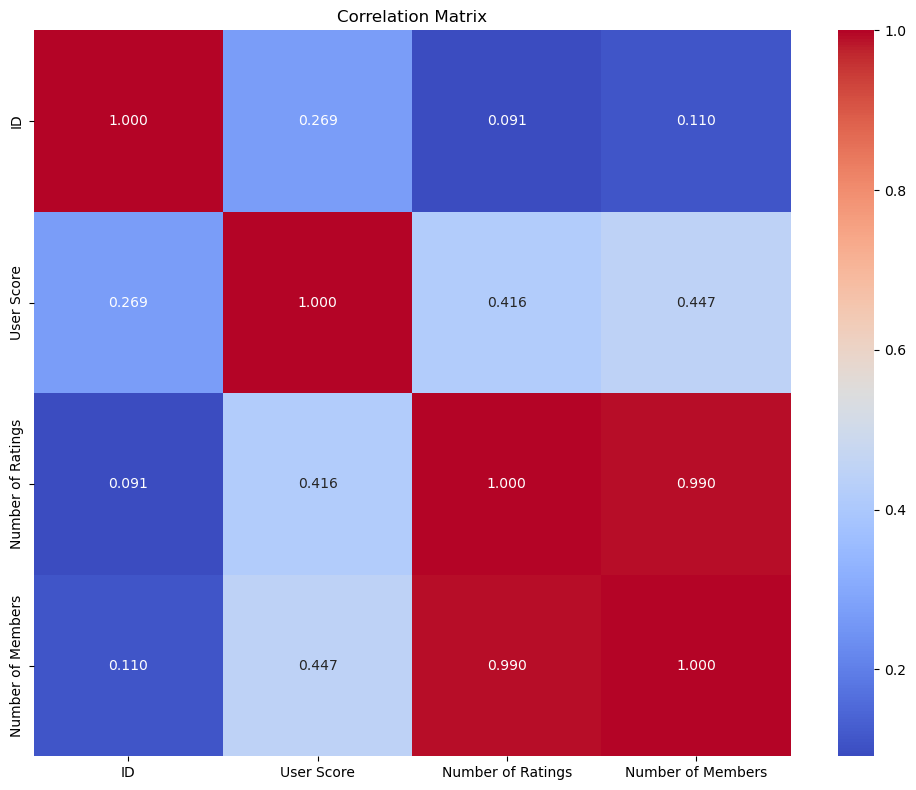

In [22]:
# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".3f", cmap='coolwarm')
plt.title("Correlation Matrix")

plt.tight_layout()
plt.show()

#### Comments
- All correlations are **positive**.
- **ID**: From **weak** to **very weak** correlation with all other variables (close to 0):    
    - ```User Score```: $\approx 0.269$ (weak positive correlation).
    - ```Number of Ratings```: $\approx 0.091$ (very weak positive correlation).
    - ```Number of Members```: $\approx 0.110$ (very weak positive correlation).

$\rightarrow$ The ```ID``` column is just a **unique identifier** and does not **contribute** significantly to **meaningful relationships**.
- **User Score**: **Moderate** positive correlation with:
    - ```Number of Ratings```: $\approx 0.416$.
    - ```Number of Members```: $\approx 0.447$.

$\rightarrow$ Higher ```User Score``` tend to be associated with a **moderate** increase in the number of ratings and members, but the **relationship** is not **strong**.
- ```Number of Ratings``` and ```Number of Members``` have **very strong** positive correlation ($\approx 0.990$).

$\rightarrow$ Anime with a high number of ratings **also** tend to have a high number of members. This relationship is intuitive as **more popular** anime are rated by a **larger audience**.

$\rightarrow$ Because ```User Score``` is actually derived from ```Number of Ratings```, we will remove ```Number of Ratings``` column to **simplify** our dataset and **generalize** the final results.

In [23]:
anime_data = anime_data.drop(columns=['Number of Ratings'])
anime_data

,ID,Title,Alternative Title (en),Media Type,Status,Premiered Season,Genres,User Score,Number of Members,Studios,Rating
0,3907,Ginga Sengoku Gunyuuden Rai,Galaxy Warring State Chronicle Rai,tv,finished_airing,Spring 1994,"Adventure, Romance, Sci-Fi, Shounen, Space",7.89,16666,E&G Films,pg_13
1,1573,Kishin Douji Zenki,Zenki,tv,finished_airing,Winter 1995,"Action, Comedy, Drama, Fantasy, Horror, Mythol...",6.97,15154,Studio Deen,pg_13
2,520,Marmalade Boy Movie,None,movie,finished_airing,Winter 1995,"Romance, Shoujo",7.29,11688,Toei Animation,pg_13
3,103,Akazukin Chacha,Red Riding Hood Chacha,tv,finished_airing,Winter 1994,"Adventure, Comedy, Fantasy, Mahou Shoujo, Roma...",7.40,16950,Gallop,g
4,813,Dragon Ball Z,Dragon Ball Z,tv,finished_airing,Spring 1989,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.19,1261770,Toei Animation,pg_13
...,...,...,...,...,...,...,...,...,...,...,...
2324,58488,Sengoku Youko: Senma Konton-hen,Sengoku Youko 2nd Season,tv,currently_airing,Summer 2024,"Action, Adventure, Fantasy, Historical, Mythol...",7.26,21154,White Fox,pg_13
2325,52995,Arifureta Shokugyou de Sekai Saikyou Season 3,Arifureta: From Commonplace to World's Stronge...,tv,currently_airing,Fall 2024,"Action, Adventure, Fantasy, Harem, Isekai",7.36,139526,asread.,r
2326,57611,Kimi wa Meido-sama.,You are Ms. Servant.,tv,finished_airing,Fall 2024,"Comedy, Romance",7.10,94185,Felix Film,pg_13
2327,57891,Hitoribocchi no Isekai Kouryaku,Loner Life in Another World,tv,finished_airing,Fall 2024,"Action, Adventure, Fantasy, Isekai",6.57,86450,"Passione, Hayabusa Film",pg_13


### Unnecessary columns
- Based on the initial problems identified, the subsequent **analysis** will hardly use columns ```ID```, ```Title```, and ```Alternative Title (en)```

$\rightarrow$ **Drop** these columns from the dataset.

In [24]:
anime_data = anime_data.drop(columns=['ID', 'Title', 'Alternative Title (en)'])

# Check dataset
anime_data

,Media Type,Status,Premiered Season,Genres,User Score,Number of Members,Studios,Rating
0,tv,finished_airing,Spring 1994,"Adventure, Romance, Sci-Fi, Shounen, Space",7.89,16666,E&G Films,pg_13
1,tv,finished_airing,Winter 1995,"Action, Comedy, Drama, Fantasy, Horror, Mythol...",6.97,15154,Studio Deen,pg_13
2,movie,finished_airing,Winter 1995,"Romance, Shoujo",7.29,11688,Toei Animation,pg_13
3,tv,finished_airing,Winter 1994,"Adventure, Comedy, Fantasy, Mahou Shoujo, Roma...",7.40,16950,Gallop,g
4,tv,finished_airing,Spring 1989,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.19,1261770,Toei Animation,pg_13
...,...,...,...,...,...,...,...,...
2324,tv,currently_airing,Summer 2024,"Action, Adventure, Fantasy, Historical, Mythol...",7.26,21154,White Fox,pg_13
2325,tv,currently_airing,Fall 2024,"Action, Adventure, Fantasy, Harem, Isekai",7.36,139526,asread.,r
2326,tv,finished_airing,Fall 2024,"Comedy, Romance",7.10,94185,Felix Film,pg_13
2327,tv,finished_airing,Fall 2024,"Action, Adventure, Fantasy, Isekai",6.57,86450,"Passione, Hayabusa Film",pg_13


### Sort dataset
- Sort dataset by column ```Premiered Season```.
- **Purpose**:
    - Support the analysis of anime release trends across seasons and years.
    - Easy to identify patterns that change over time, such as the development of genres, user scores, or anime popularity over time.
    - Get an overview of release times and factors related to each period.

In [25]:
# Define a custom order for seasons
season_order = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4}

# Extract the season and year from the "Premiered Season" column
anime_data['Season Name'] = anime_data['Premiered Season'].str.split().str[0]
anime_data['Year'] = anime_data['Premiered Season'].str.split().str[1].astype(int)

anime_data = anime_data.sort_values(
    by=['Year', 'Season Name'],
    key=lambda col: col.map(season_order) if col.name == 'Season Name' else col
)

# Remove temp columns
anime_data = anime_data.drop(columns=['Season Name', 'Year'])

# Reset the index after sorting
anime_data = anime_data.reset_index(drop=True)

anime_data

,Media Type,Status,Premiered Season,Genres,User Score,Number of Members,Studios,Rating
0,tv,finished_airing,Spring 1979,"Adventure, Anthropomorphic, Comedy, Fantasy, K...",7.86,66328,Shin-Ei Animation,pg
1,tv,finished_airing,Spring 1989,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.19,1261770,Toei Animation,pg_13
2,tv,currently_airing,Spring 1992,"Comedy, Ecchi, School, Seinen",7.80,87291,Shin-Ei Animation,g
3,tv,finished_airing,Fall 1993,"School, Shounen, Sports, Team Sports",8.55,313954,Toei Animation,pg_13
4,tv,finished_airing,Winter 1994,"Adventure, Comedy, Fantasy, Mahou Shoujo, Roma...",7.40,16950,Gallop,g
...,...,...,...,...,...,...,...,...
2324,tv,currently_airing,Fall 2024,"Adult Cast, Drama, Seinen",7.03,18379,Madhouse,pg_13
2325,tv,currently_airing,Fall 2024,"Action, Adventure, Fantasy, Harem, Isekai",7.36,139526,asread.,r
2326,tv,finished_airing,Fall 2024,"Comedy, Romance",7.10,94185,Felix Film,pg_13
2327,tv,finished_airing,Fall 2024,"Action, Adventure, Fantasy, Isekai",6.57,86450,"Passione, Hayabusa Film",pg_13


### Statistics

### Non-numeric columns
- List of **non-numeric** columns:

In [26]:
non_numeric_df = anime_data.select_dtypes(exclude='number')
non_numeric_df

,Media Type,Status,Premiered Season,Genres,Studios,Rating
0,tv,finished_airing,Spring 1979,"Adventure, Anthropomorphic, Comedy, Fantasy, K...",Shin-Ei Animation,pg
1,tv,finished_airing,Spring 1989,"Action, Adventure, Comedy, Fantasy, Martial Ar...",Toei Animation,pg_13
2,tv,currently_airing,Spring 1992,"Comedy, Ecchi, School, Seinen",Shin-Ei Animation,g
3,tv,finished_airing,Fall 1993,"School, Shounen, Sports, Team Sports",Toei Animation,pg_13
4,tv,finished_airing,Winter 1994,"Adventure, Comedy, Fantasy, Mahou Shoujo, Roma...",Gallop,g
...,...,...,...,...,...,...
2324,tv,currently_airing,Fall 2024,"Adult Cast, Drama, Seinen",Madhouse,pg_13
2325,tv,currently_airing,Fall 2024,"Action, Adventure, Fantasy, Harem, Isekai",asread.,r
2326,tv,finished_airing,Fall 2024,"Comedy, Romance",Felix Film,pg_13
2327,tv,finished_airing,Fall 2024,"Action, Adventure, Fantasy, Isekai","Passione, Hayabusa Film",pg_13


- For these columns, we will **calculate**:
    - The number of **distinct elements**: ```num_distinct_elements```.
    - The **percentage** of each element, sorted in **descending order**: ```element_ratios```.
- Visualize the **proportions** using appropriate types of **charts**.

In [27]:
# Define functions for the calculations mentioned above
def num_distinct_elements(series):
    unique_values = series.dropna().value_counts()
    return len(unique_values)
        
def element_ratios(series):
    unique_values = series.dropna().value_counts(normalize=True)
    ratios = (unique_values * 100).round(1).to_dict()
    return ratios

In [28]:
# Apply functions
non_numeric_info_df = non_numeric_df.agg([num_distinct_elements, element_ratios])

# Check
non_numeric_info_df

,Media Type,Status,Premiered Season,Genres,Studios,Rating
num_distinct_elements,2,2,127,1432,331,5
element_ratios,"{'tv': 76.5, 'movie': 23.5}","{'finished_airing': 98.8, 'currently_airing': ...","{'Summer 2018': 1.6, 'Summer 2015': 1.6, 'Fall...","{'Action, Adventure, Fantasy, Shounen': 1.5, '...","{'Madhouse': 5.2, 'Toei Animation': 5.2, 'J.C....","{'pg_13': 63.8, 'r': 19.5, 'g': 5.8, 'pg': 5.5..."


- **Additional** function(s):

In [29]:
# Function to hide small percentage labels (for pie chart)
def autopct_func(pct):
    return f'{pct:.1f}%' if pct >= 5 else ''  # Only show if >=5%

#### Column ```Media Type```

In [30]:
# Show column information
non_numeric_info_df['Media Type']

num_distinct_elements                              2
element_ratios           {'tv': 76.5, 'movie': 23.5}
Name: Media Type, dtype: object

Plot saved to ./data/media_type_distribution.png


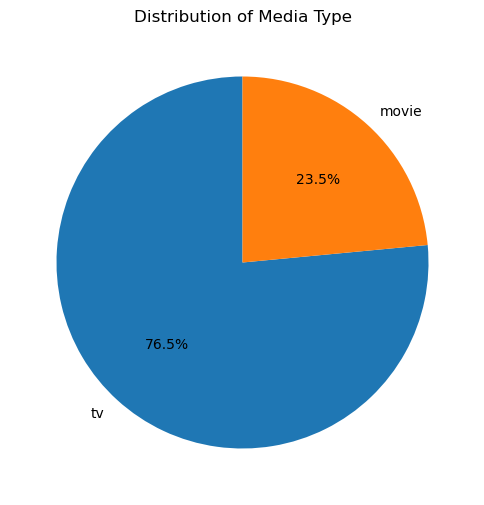

In [31]:
# Visualize element_ratios by using pie chart
element_ratios = non_numeric_info_df['Media Type'].loc['element_ratios']
labels = element_ratios.keys()
values = element_ratios.values()

plt.figure(figsize=(6, 8))
plt.pie(
    values,
    labels=labels,
    autopct=autopct_func, # Hide small percentage labels
    startangle=90,  
)
plt.title("Distribution of Media Type")

# Save the plot for furthur analysis
output_path = "./data/media_type_distribution.png"
plt.savefig(output_path, format='png', dpi=300)
print(f"Plot saved to {output_path}")

plt.show()

- **Comment(s)**: Most of anime in this dataset are **TV series** ($\approx 76.5 \%$). 

#### Column ```Status```

In [32]:
# Show column information
non_numeric_info_df['Status']

num_distinct_elements                                                    2
element_ratios           {'finished_airing': 98.8, 'currently_airing': ...
Name: Status, dtype: object

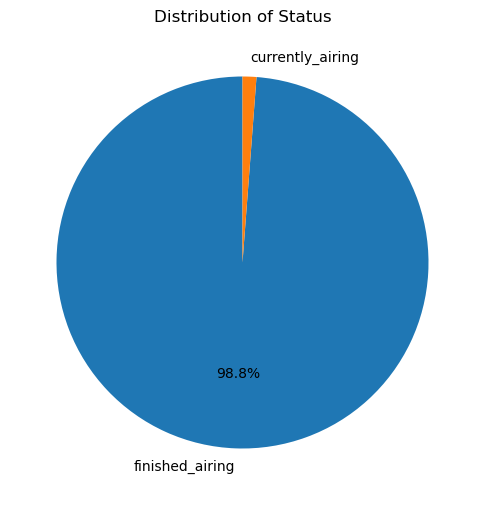

In [33]:
# Visualize element_ratios by using pie chart
element_ratios = non_numeric_info_df['Status'].loc['element_ratios']
labels = element_ratios.keys()
values = element_ratios.values()

plt.figure(figsize=(6, 8))
plt.pie(
    values,
    labels=labels,
    autopct=autopct_func, # Hide small percentage labels
    startangle=90,  
)
plt.title("Distribution of Status")

plt.show()

- **Comment(s)**:
    - The most common **status** of anime in this dataset is ```finished_airing``` ($\approx 98.8 \%$).
    - **Almost** all values in this column **fall** into **a single category** (```finished_airing```), and the number of categories is very limited (only $2$ categories) $\rightarrow$ It has almost **no analytical** value.

$\rightarrow$ Drop ```Status``` column.

In [34]:
anime_data = anime_data.drop(columns=['Status'])

# Check dataset
anime_data

,Media Type,Premiered Season,Genres,User Score,Number of Members,Studios,Rating
0,tv,Spring 1979,"Adventure, Anthropomorphic, Comedy, Fantasy, K...",7.86,66328,Shin-Ei Animation,pg
1,tv,Spring 1989,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.19,1261770,Toei Animation,pg_13
2,tv,Spring 1992,"Comedy, Ecchi, School, Seinen",7.80,87291,Shin-Ei Animation,g
3,tv,Fall 1993,"School, Shounen, Sports, Team Sports",8.55,313954,Toei Animation,pg_13
4,tv,Winter 1994,"Adventure, Comedy, Fantasy, Mahou Shoujo, Roma...",7.40,16950,Gallop,g
...,...,...,...,...,...,...,...
2324,tv,Fall 2024,"Adult Cast, Drama, Seinen",7.03,18379,Madhouse,pg_13
2325,tv,Fall 2024,"Action, Adventure, Fantasy, Harem, Isekai",7.36,139526,asread.,r
2326,tv,Fall 2024,"Comedy, Romance",7.10,94185,Felix Film,pg_13
2327,tv,Fall 2024,"Action, Adventure, Fantasy, Isekai",6.57,86450,"Passione, Hayabusa Film",pg_13


#### Column ```Rating```

In [35]:
# Show column information
non_numeric_info_df['Rating']

num_distinct_elements                                                    5
element_ratios           {'pg_13': 63.8, 'r': 19.5, 'g': 5.8, 'pg': 5.5...
Name: Rating, dtype: object

Plot saved to ./data/rating_distribution.png


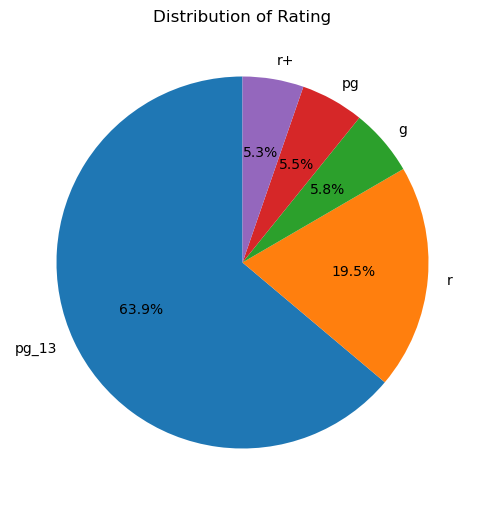

In [36]:
# Visualize element_ratios by using pie chart
element_ratios = non_numeric_info_df['Rating'].loc['element_ratios']
labels = element_ratios.keys()
values = element_ratios.values()

plt.figure(figsize=(6, 8))
plt.pie(
    values,
    labels=labels,
    autopct=autopct_func, # Hide small percentage labels
    startangle=90,  
)
plt.title("Distribution of Rating")

# Save the plot for furthur analysis
output_path = "./data/rating_distribution.png"
plt.savefig(output_path, format='png', dpi=300)
print(f"Plot saved to {output_path}")

plt.show()

- **Comment(s)**: The most common **rating** of anime in this dataset is ```pg_13``` (teens 13 or older) with $\approx 63.9 \%$, the least one is ```r+``` (mild nudity) with $\approx 5.3 \%$.

#### Column ```Premiered Season```
- For this column, we will use **Line** chart for visualization, because the value set is **large**, and the subject of this column is **related to time**.

In [37]:
value_counts = non_numeric_df['Premiered Season'].value_counts()

# Show column information
value_counts

Premiered Season
Summer 2018    38
Summer 2015    38
Fall 2024      36
Fall 2014      36
Spring 2016    36
               ..
Spring 1989     1
Winter 1994     1
Fall 1993       1
Spring 1992     1
Spring 1979     1
Name: count, Length: 127, dtype: int64

In [38]:
# Preprocessing
def season_to_datetime(season):
    season_map = {'Winter': 1, 'Spring': 4, 'Summer': 7, 'Fall': 10}
    season_name, year = season.split()
    return pd.Timestamp(year=int(year), month=season_map[season_name], day=1)

# Sort Premiered Season by time order
value_counts = value_counts.rename_axis('Premiered Season').reset_index(name='Count')
value_counts['Date'] = value_counts['Premiered Season'].apply(season_to_datetime)
value_counts = value_counts.sort_values('Date')

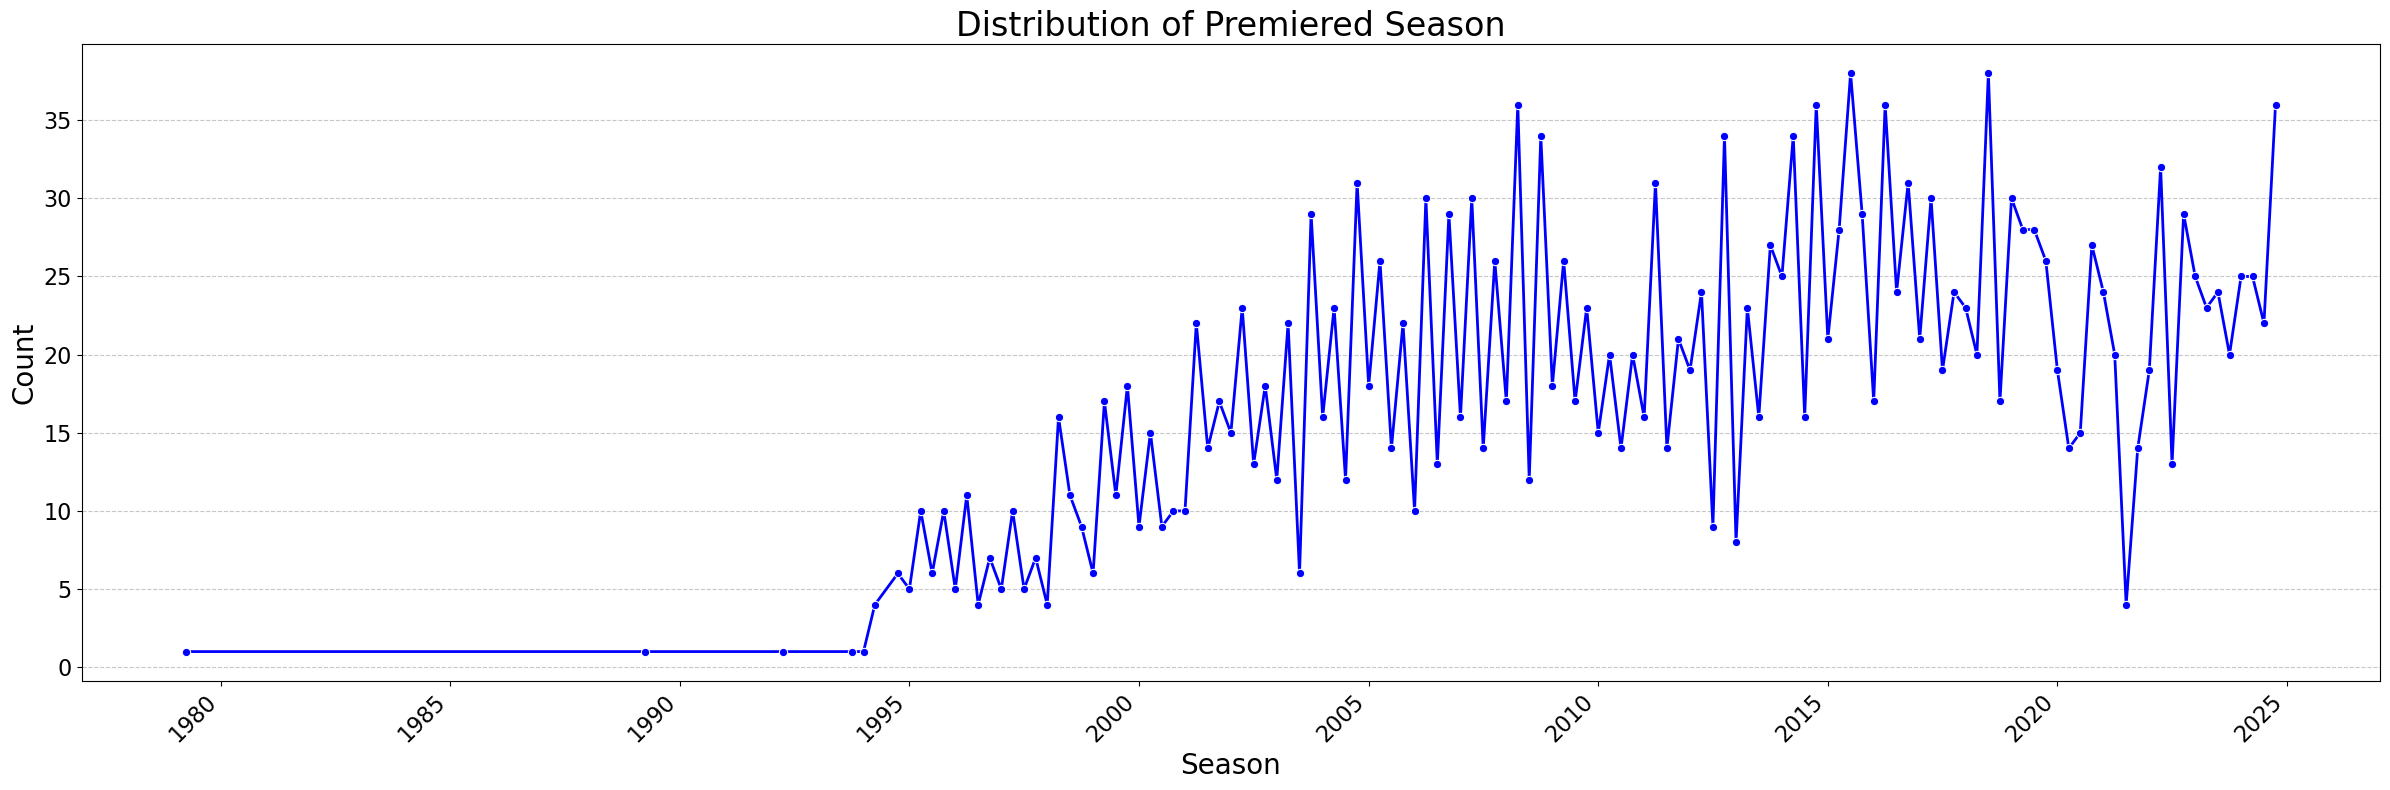

In [39]:
# Visualize by using line chart
plt.figure(figsize=(24, 8))
sns.lineplot(
    x='Date',
    y='Count',
    data=value_counts,
    marker='o',
    linewidth=2,
    color='blue'
)
plt.title("Distribution of Premiered Season", fontsize=24)
plt.xlabel("Season", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **Comment(s)**: The number of anime almost always shows **significant variation** across seasons.

#### Column ```Genres```
- With this column, we only consider **included genres** (check the list below) and using **horizontal bar** chart for visualization.

In [40]:
# Included genres list
included_genres = [
    'action', 'adventure', 'comedy', 'drama', 'fantasy',
    'mystery', 'romance', 'sci-fi', 'sports',
    'slice of life', 'horror', 'supernatural'
]

In [41]:
value_counts = (
    non_numeric_df['Genres']
    .str.split(', ')
    .explode()
    .str.lower()
    .value_counts()
    .loc[included_genres]
    .sort_values(ascending=False)
)

# Show column information
print(value_counts)

Genres
action           992
comedy           799
fantasy          655
drama            650
adventure        599
sci-fi           512
romance          494
supernatural     278
mystery          274
slice of life    147
sports           138
horror            81
Name: count, dtype: int64


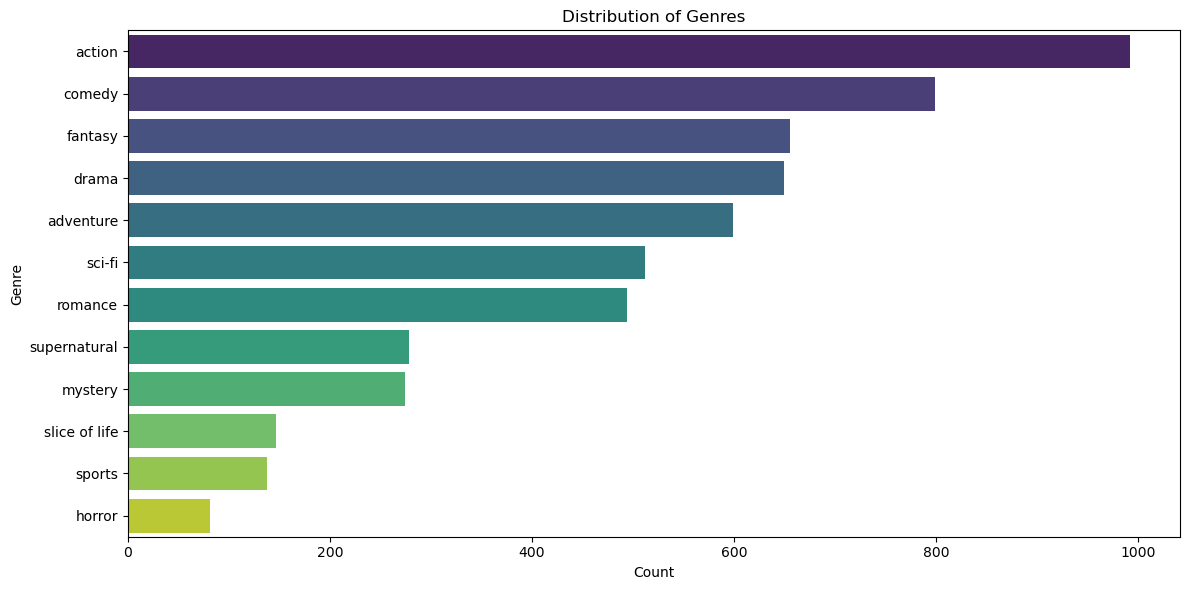

In [42]:
# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(
    x=value_counts.values,
    y=value_counts.index,
    palette='viridis',
    hue=value_counts.index,  # Assign y to hue
    legend=False
)
plt.title("Distribution of Genres")
plt.xlabel("Count")
plt.ylabel("Genre")

plt.tight_layout()
plt.show()

- **Comment(s)**: The **most** common genre of anime in this dataset is ```action```, the least one is ```horror```. 

#### Column ```Studios```
- With this column, we will extract the **name** of **each** studio and calculate the **percentage** (without **visualization**).

In [43]:
# Split the Studios column into individual studios and count their occurrences
studio_names = (
    non_numeric_df['Studios']
    .str.split(', ')  
    .explode()
    .value_counts()
)

# Show column information
print(studio_names)

Studios
Madhouse                    132
Toei Animation              121
J.C.Staff                   111
Production I.G              109
Sunrise                     106
                           ... 
Bee Media                     1
Oh! Production                1
Jinnis Animation Studios      1
Front Line                    1
Studio Moe                    1
Name: count, Length: 261, dtype: int64


In [44]:
# Calculate the percentage of each element
percentage = (studio_names / studio_names.sum() * 100).round(1)
percentage

Studios
Madhouse                    5.3
Toei Animation              4.8
J.C.Staff                   4.4
Production I.G              4.4
Sunrise                     4.2
                           ... 
Bee Media                   0.0
Oh! Production              0.0
Jinnis Animation Studios    0.0
Front Line                  0.0
Studio Moe                  0.0
Name: count, Length: 261, dtype: float64

### Numeric columns
- List of **numeric** columns (excluding ```ID```):

In [45]:
numeric_df = anime_data.select_dtypes(include='number')
numeric_df

,User Score,Number of Members
0,7.86,66328
1,8.19,1261770
2,7.80,87291
3,8.55,313954
4,7.40,16950
...,...,...
2324,7.03,18379
2325,7.36,139526
2326,7.10,94185
2327,6.57,86450


- For these columns, we will **calculate** these following metrics:
    - Mean.
    - Median.
    - Mode.
    - Min and Max (Range).
    - First quartile ($\text{Q1}$).
    - Third quartile ($\text{Q3}$).
    - Variance and Standard Deviation.
- Visualize the **distribution** using histograms or boxplots.

In [46]:
# Define functions for the calculations mentioned above
def mode(series):
    return series.mode()[0] # In these cases, mode has only one

def lower_quartile(series): # Q1
    return series.quantile(0.25)

def upper_quartile(series): # Q3
    return series.quantile(0.75)

def variance(series):
    return series.var()

def std_dev(series):
    return series.std()

In [47]:
# Apply functions
numeric_info_df = numeric_df.agg([
    "mean",
    "median",
    mode,
    "min",
    "max",
    lower_quartile,
    upper_quartile,
    variance,
    std_dev
])

# Check
numeric_info_df = numeric_info_df.round(2) # 2 decimal places
numeric_info_df

,User Score,Number of Members
mean,7.54,2.837806e+05
median,7.51,1.118200e+05
mode,7.53,1.080600e+04
min,5.73,1.004700e+04
max,9.32,4.079122e+06
lower_quartile,7.16,3.697200e+04
upper_quartile,7.90,3.087390e+05
variance,0.31,2.068271e+11
std_dev,0.56,4.547824e+05


#### Column ```User Score```

In [48]:
# Show column statistics
user_score_info = numeric_info_df['User Score']
user_score_info

mean              7.54
median            7.51
mode              7.53
min               5.73
max               9.32
lower_quartile    7.16
upper_quartile    7.90
variance          0.31
std_dev           0.56
Name: User Score, dtype: float64

- Draw the **distribution** using a **histogram** and **overlay** a kernel density estimation (**KDE**, [reference here](https://en.wikipedia.org/wiki/Kernel_density_estimation)) curve.

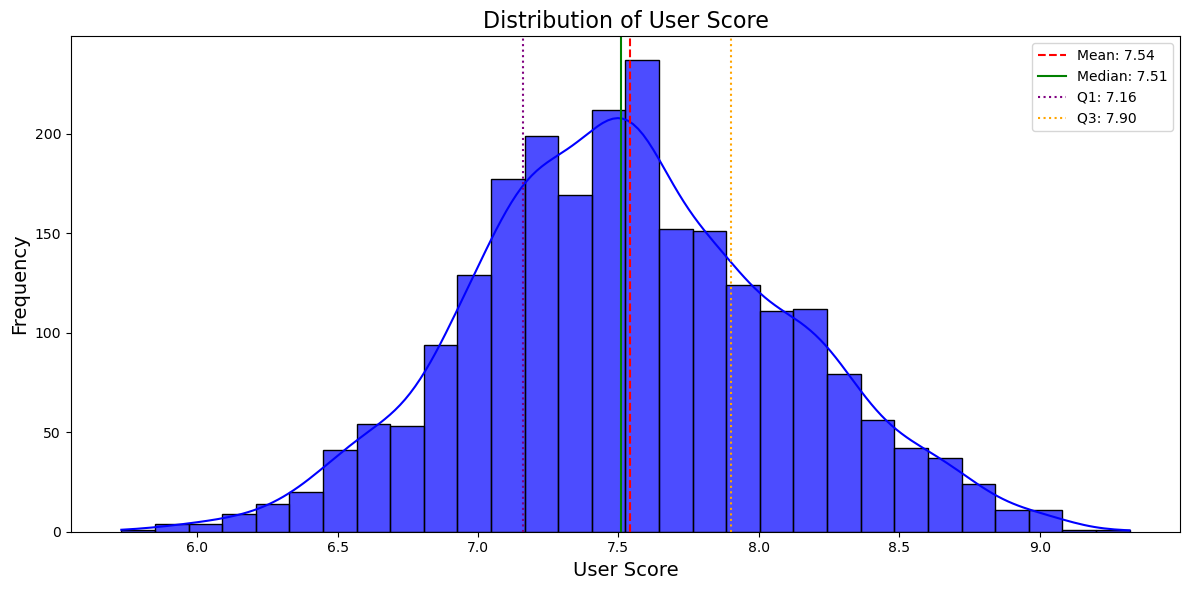

In [49]:
# Plot the distribution by using histogram with KDE curve
plt.figure(figsize=(12, 6))
sns.histplot(numeric_df['User Score'], kde=True, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(user_score_info['mean'], color='red', linestyle='--', label=f'Mean: {user_score_info['mean']:.2f}')
plt.axvline(user_score_info['median'], color='green', linestyle='-', label=f'Median: {user_score_info['median']:.2f}')
plt.axvline(user_score_info['lower_quartile'], color='purple', linestyle=':', label=f'Q1: {user_score_info['lower_quartile']:.2f}')
plt.axvline(user_score_info['upper_quartile'], color='orange', linestyle=':', label=f'Q3: {user_score_info['upper_quartile']:.2f}')
plt.title("Distribution of User Score", fontsize=16)
plt.xlabel("User Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()

- **Comment(s)**:
    - The ```mean``` ($\approx 7.54$), ```median``` ($7.51$), and ```mode``` ($7.53$) values are **approximately equal**.
    - The distance between the ```first_quartile``` ($7.16$) and the ```median``` ($7.51$), as well as the ```min``` ($5.73$) is **approximately equal** to the distance between the ```third_quartile``` ($7.90$) and the ```median```, as well as the ```max``` ($9.32$).

$\rightarrow$ The distribution of ```User Score``` is approximately similar to a **Normal Distribution** $\rightarrow$ The dataset is **good** and highly **reliable**. 

#### Column ```Number of Members```

In [50]:
# Show column statistics
number_of_members_info = numeric_info_df['Number of Members']
number_of_members_info

mean              2.837806e+05
median            1.118200e+05
mode              1.080600e+04
min               1.004700e+04
max               4.079122e+06
lower_quartile    3.697200e+04
upper_quartile    3.087390e+05
variance          2.068271e+11
std_dev           4.547824e+05
Name: Number of Members, dtype: float64

- As we can see, the **range** of this column is **very large** (from $1 \cdot 10^4$ to $4 \cdot 10^6$). Therefore, we should use a **boxplot** for visualization instead of a histogram (as it's **difficult** to determine appropriate **bins**).

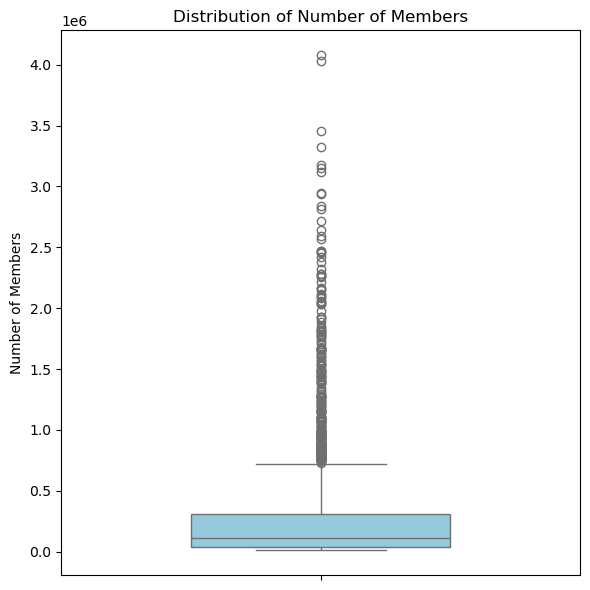

In [51]:
# Plot the distribution by using boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(data=numeric_df, y='Number of Members', color='skyblue', width=0.5)
plt.title("Distribution of Number of Members")

plt.tight_layout()
plt.show()

- **Comment(s)**: The dataset visualized using a **boxplot** has detected a **significant** number of **outliers**. However, we **do not need** to handle or remove them because all the data in this column is **crucial** for the subsequent **analysis** steps.

## Save cleaned dataset to CSV file 

In [52]:
# Save cleaned dataset
anime_data.to_csv('./data/anime_data_cleaned.csv', index=False)
print(f"Data saved!")

Data saved!
